# Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

Here, we have 4177 rows and 9 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df["Rings"].value_counts

<bound method IndexOpsMixin.value_counts of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

# Statistical Summary

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

no null,values are presents here, let's check it by visualization tool

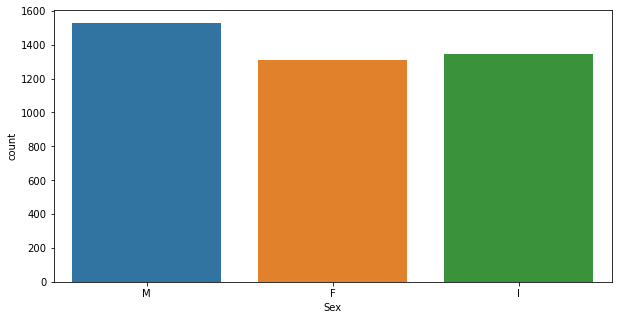

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show()

# One Hot Encoder

In [13]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df)

In [14]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


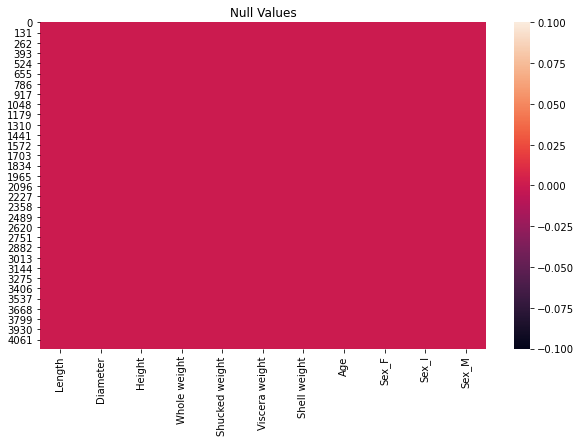

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

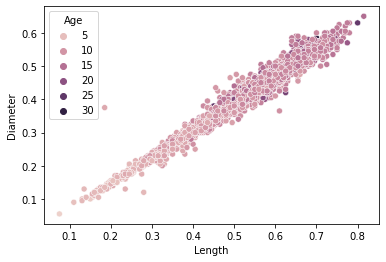

In [16]:
sns.scatterplot(x="Length",y="Diameter",data=df,hue="Age")

As the above visualization shows that both diameter and length is in linear line.

<AxesSubplot:xlabel='Whole weight', ylabel='Height'>

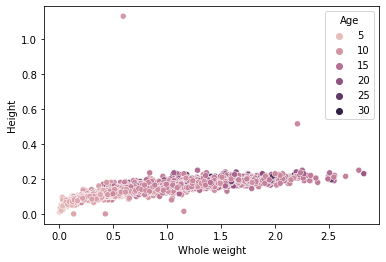

In [84]:
sns.scatterplot(x="Whole weight",y="Height",data=df,hue="Age")

Above Visualization shows that Heigh is constant with respect to whole weight.

# Checking correlation

In [18]:
cor=df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


We will Check the Skewness and outliers in further step

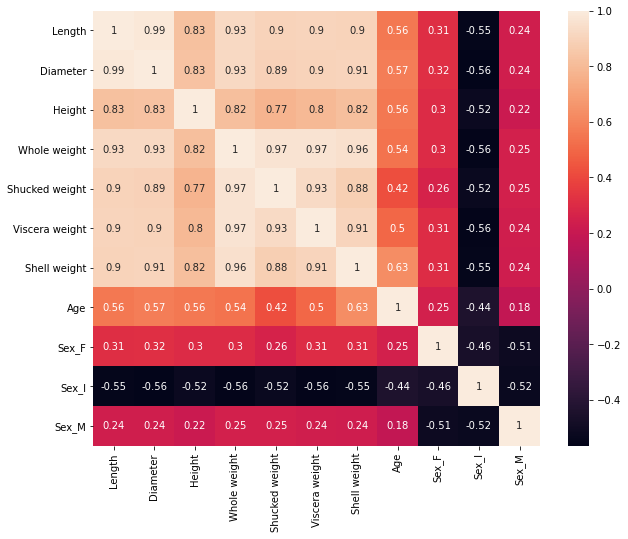

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.show()

# Checking Outliers

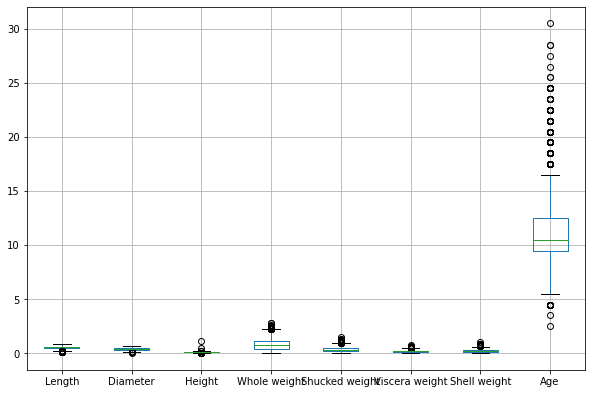

In [21]:
df[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Age"]].boxplot(figsize=(10,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

As we can clealry see the outliers are present in the data set, so by using IQR mehtod it will be removed

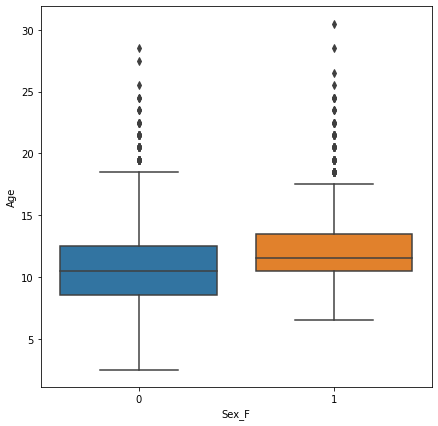

In [23]:
plt.figure(figsize=(7, 7))
_= sns.boxplot(data=df, x='Sex_F', y='Age')

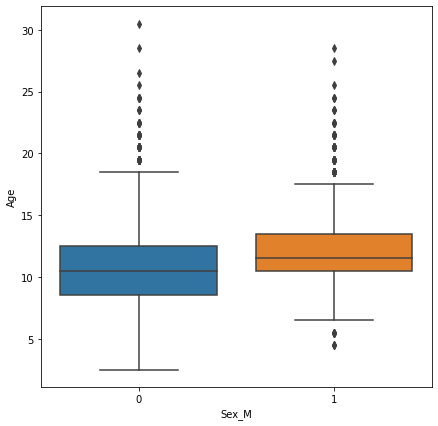

In [24]:
plt.figure(figsize=(7, 7))
_= sns.boxplot(data=df, x='Sex_M', y='Age')

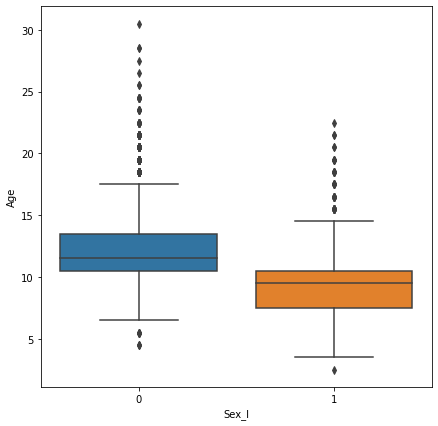

In [25]:
plt.figure(figsize=(7, 7))
_= sns.boxplot(data=df, x='Sex_I', y='Age')

# Checking Skewness

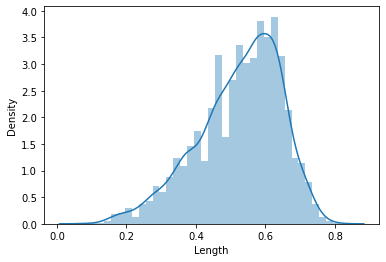

In [26]:
sns.distplot(df["Length"])
plt.show()

Above Visualization shows the Right Skewness

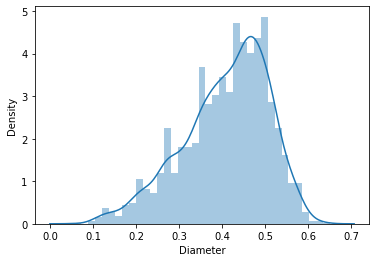

In [27]:
sns.distplot(df["Diameter"])
plt.show()

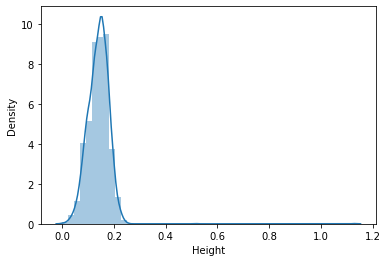

In [28]:
sns.distplot(df["Height"])
plt.show()

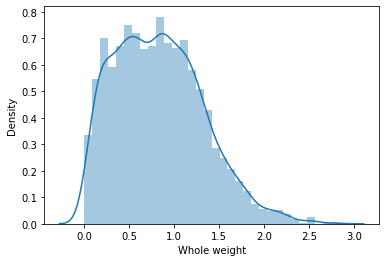

In [29]:
sns.distplot(df["Whole weight"])
plt.show()

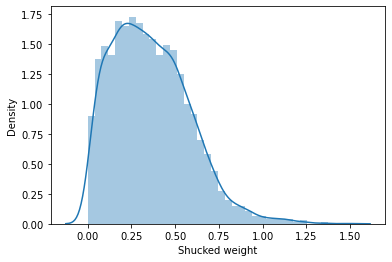

In [30]:
sns.distplot(df["Shucked weight"])
plt.show()

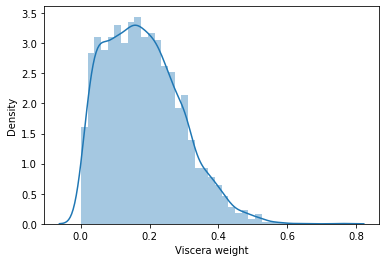

In [31]:
sns.distplot(df["Viscera weight"])
plt.show()

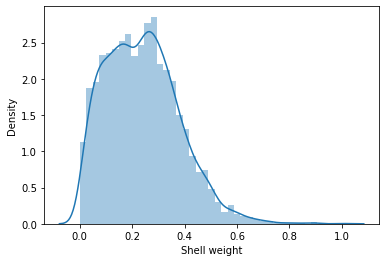

In [32]:
sns.distplot(df["Shell weight"])
plt.show()

In [33]:
x=df.drop("Age",axis=1)
y=df["Age"]

In [34]:
x.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

# Data Cleansing

In [35]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [36]:
df_new.shape

(3781, 11)

In [37]:
loss_percentage=(4177-3781)/209593*100
print(loss_percentage)

0.1889376076491104


In [38]:
df_new.skew()

Length           -0.495017
Diameter         -0.481941
Height           -0.152640
Whole weight      0.345472
Shucked weight    0.455297
Viscera weight    0.454848
Shell weight      0.342490
Age               0.269205
Sex_F             0.838224
Sex_I             0.706546
Sex_M             0.584953
dtype: float64

# Finding The Best Random State

In [45]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAucc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.575100197267312 on random_state 30


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_trains = ss.fit_transform(x_train)
x_tests = ss.transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression

lr=LinearRegression()
lr.fit(x_trains,y_train)
pred=lr.predict(x_tests)
print(r2_score(y_test,pred))


0.541858648408017


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_trains,y_train)
pred=rf.predict(x_tests)
print(r2_score(y_test,pred))

0.5421920256126744


In [59]:
from sklearn.svm import SVR
svr=SVR()
SVC.fit(x_trains,y_train)
pred=SVC.predict(x_tests)
print(r2_score(y_test,pred))

0.5517019291825074


In [53]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_trains,y_train)
pred=ad.predict(x_tests)
print(r2_score(y_test,pred))

0.23728767363791214


In [54]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_trains,y_train)
pred=kn.predict(x_tests)
print(r2_score(y_test,pred))

0.5004234350200507


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of Logistic Regression",scr.mean())

Cross validation Score of Logistic Regression 0.4186023342895324


In [57]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Random Forest Classifier",scr.mean())

Cross validation Score of Random Forest Classifier 0.438991923220508


In [60]:
scr=cross_val_score(svr,x,y,cv=5)
print("Cross validation Score of Support Vector Classifier",scr.mean())

Cross validation Score of Support Vector Classifier 0.44783340684803435


In [63]:
scr=cross_val_score(ad,x,y,cv=5)
print("Cross validation Score of AdaBoost Classifier",scr.mean())

Cross validation Score of AdaBoost Classifier -0.26178553798296


In [64]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of Kneighbors Classifier",scr.mean())

Cross validation Score of Kneighbors Classifier 0.42710431477074684


Here we got least difference in KNeoghborsClassifier. So we do Hyper tuning in KNeighbors

# Hyper parameter_tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
#creating parameter list to pass in GridSearchCV

parameters={"n_neighbors":(1,2,3,4,5,6,7,8,9),
           "algorithm":["auto","ball_tree","kd_tree","brute"]}

In [70]:
GCV=GridSearchCV(KNeighborsRegressor(),parameters,cv=5) #tuning AdaBoost

In [71]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9)})

In [72]:
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 9}

In [77]:
kn_mod=KNeighborsRegressor(algorithm="auto",n_neighbors=9)

kn_mod.fit(x_trains,y_train)
pred=kn_mod.predict(x_tests)
print(r2_score(y_test,pred)*100)

52.67907349195446


In [81]:
import joblib
joblib.dump(kn_mod,"abalone.pkl")

['abalone.pkl']